## Рынок заведений общественного питания Москвы

### Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

---

### <a id="stepend"> Оглавление</a>

- [Импорт библиотек, данных и получение первичной информации](#step1)
- [Предобработка данных](#step2)
- [Исследовательский анализ данных](#step3)
- [Общий вывод](#step4)

---

### Материалы

#### Презентация https://yadi.sk/i/a1ebO9GLuQiSpA

### План исследования
- Исследовать соотношение видов объектов общественного питания по количеству и построить график;
- Исследовать соотношение сетевых и несетевых заведений по количеству и построить график;
- Определить, для какого вида объекта общественного питания характерно сетевое распространение;
- Ответить на вопрос, что характерно для сетевых заведений;
- Для каждого объекта общественного питания определить среднее количество посадочных мест и построить графики;
- В отдельный столбец выделить информацию об улице из столбца address;
- Построить график топ-10 улиц по количеству объектов общественного питания и ответить на вопрос, в каких районах Москвы находятся эти улицы;
- Найти число улиц с одним объектом общественного питаний и ответить на вопрос, в каком районе Москвы находятся эти улицы;
- Посмотреть на распределение количество посадочных мест для улиц с большим количеством объектов общественного питания и определить закономерности;
- Сделать общий вывод и дать рекомендации; прокомментировать возможность развития сети.
- Подготовить презентацию исследования для инвесторов.

### <a id='step1'>Импорт библиотек, данных и получение первичной информации</a>

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from io import BytesIO

In [2]:
# импортируем данные
rest_data = pd.read_csv('C:/Users/sokol/OneDrive/Рабочий стол/portfolio/yandexp/Рынок заведений общественного питания Москвы/rest_data.csv')

In [3]:
# установим лимит на отображние символов в строках таблицы
pd.set_option('max_colwidth', -1)

C:\Users\sokol\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [4]:
# первичное представление о данных
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
# первые 5 строк
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [6]:
# уникальные значения
for column in rest_data.columns:
    print(rest_data[column].value_counts())

27662     1
223307    1
185071    1
23278     1
21451     1
         ..
155041    1
21920     1
107934    1
26006     1
163840    1
Name: id, Length: 15366, dtype: int64
Столовая                          267
Кафе                              236
Шаурма                            234
KFC                               155
Шоколадница                       142
                                 ... 
КАФЕ ПРИ ГОСТИНИЦЕ ЯРОСЛАВСКАЯ    1  
СТОЛОВАЯ ПРИ АО ВНИИЭТО           1  
ГБОУ Школа №771                   1  
Rare pastrami                     1  
Бистро 160                        1  
Name: object_name, Length: 10393, dtype: int64
нет    12398
да     2968 
Name: chain, dtype: int64
кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                  856 
буфет                                585 
кафетерий                            398 
закусочная         

In [7]:
# проверим на пропуски
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [8]:
# проверим на дубликаты
rest_data.duplicated().sum()

0

#### Вывод

#### Рекомендации по предобработке:
- Привести значения столбца object_name к нижнему регистру
- Определить неявные дубликаты в столбце object_name и исправить их.

### <a id='step2'>Предобработка данных</a>

In [9]:
# приведем значения столбца object_name к нижнему регистру
rest_data['object_name'] = rest_data['object_name'].str.lower()

In [10]:
# проверим
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [11]:
# пройдемся по неявным дубликатам
rest_data = rest_data.drop_duplicates(subset=['object_name','chain','object_type','address','number'], keep='first')

In [12]:
# первичное представление
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  object
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 835.7+ KB


In [13]:
# избавимся от схожих названий заведений в столбце object_name

# соберем словарь
dictionary = {'кальян ' : '', 'кальян' : '', 'бар ' : '', 'бар' : '', '-' : ' ', ' кафе' : '', 'кафе ' : '',
              'пбо ' : '', '«' : '', '»' : '', 'предприятие быстрого обслуживания ' : '', 'магбургер азс №16' : 'магбургер',
              'магбургер азс №17' : 'магбургер', 'fridays kfc' : 'kfc', 'быстрого питания kfc' : 'kfc', 'kfc покрышкина' : 'kfc',
              'kfc волгоградский' : 'kfc', 'ростикс kfc' : 'kfc', 'закусочная kfc' : 'kfc', ' kfc' : 'kfc'}

# функция для замены значений
def clear_one_name(row):
    new_name = row['object_name']
    
    for bad_word in dictionary:
        new_name = str(new_name).replace(bad_word, dictionary[bad_word])
        return new_name

# применим функцию
rest_data['object_name'] = rest_data.apply(clear_one_name, axis=1)

### <a id='step3'>Исследовательский анализ данных</a>

In [14]:
sns.set_style("whitegrid")

In [15]:
# посчитаем кол-во заведений по каждому типу
object_types = rest_data.groupby("object_type")['object_name'].count()

In [16]:
# выведем
object_types

object_type
бар                                  855 
буфет                                576 
закусочная                           348 
кафе                                 6071
кафетерий                            395 
магазин (отдел кулинарии)            273 
предприятие быстрого обслуживания    1897
ресторан                             2282
столовая                             2584
Name: object_name, dtype: int64

In [17]:
# посчитаем процентное соотношение
count_per_types = object_types.groupby('object_type')\
.agg(Percentage = ('object_name', lambda p: p.sum() / object_types.sum() * 100))\
.round(2)\
.sort_values('Percentage', ascending = False)

In [18]:
# выведем 
count_per_types

,Percentage
object_type,
кафе,39.73
столовая,16.91
ресторан,14.93
предприятие быстрого обслуживания,12.41
бар,5.60
буфет,3.77
кафетерий,2.58
закусочная,2.28
магазин (отдел кулинарии),1.79


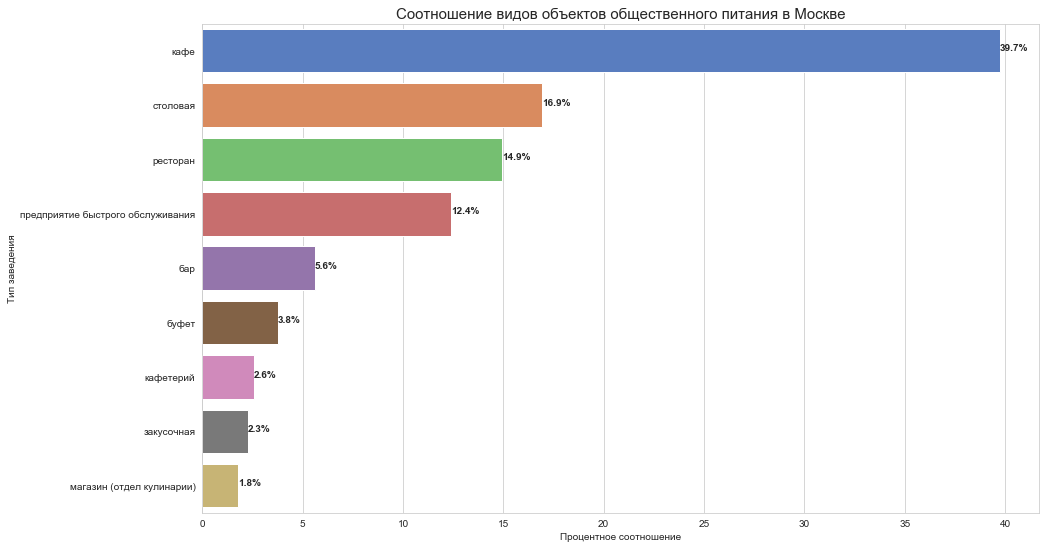

In [19]:
# нарисуем график соотношения типов объектов общественного питания
bar,ax = plt.subplots(figsize=(15, 9))
ax = sns.barplot(x='Percentage', y=count_per_types.index, data=count_per_types, ci=None, palette= "muted", orient='h' )
ax.set_title("Соотношение видов объектов общественного питания в Москве", fontsize=15)
ax.set_xlabel ("Процентное соотношение")
ax.set_ylabel ("Тип заведения")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, "%.1f%%"% rect.get_width(), weight='bold' )
plt.show();

- Самую большую долю на рынке общественного питания Москвы занимают заведения типа кафе - 39.7% - 6071 заведений;
- Самые маленькие доли заведений на рынке общественного питания Москвы занимают заведения типов магазин (отдел кулинарии) - 1.8% - 273 заведения, закусочная - 2.3% - 348 заведений, кафетерий - 2.6% - 395 заведений и буфет - 3.8% - 576 заведений;
- Практически равномерно на рынке общественного питания Москвы распределены заведения типов столовая - 16.9% - 2584 заведения, ресторан - 14.9% - 2282 заведений и предприятие быстрого обслуживания - 12.4% - 1897 заведений.

In [20]:
# посчитаем количество сетевых/несетевых заведений
object_chain_types = rest_data.groupby("chain")['object_name'].count()

In [21]:
# выведем
object_chain_types

chain
да     2964 
нет    12317
Name: object_name, dtype: int64

In [22]:
# посчитаем процентное соотношение
count_per_chain = object_chain_types.groupby('chain')\
.agg(Percentage = ('object_name', lambda p: p.sum() / object_chain_types.sum() * 100))\
.round(2)\
.sort_values('Percentage', ascending = False)

In [23]:
count_per_chain

,Percentage
chain,
нет,80.6
да,19.4


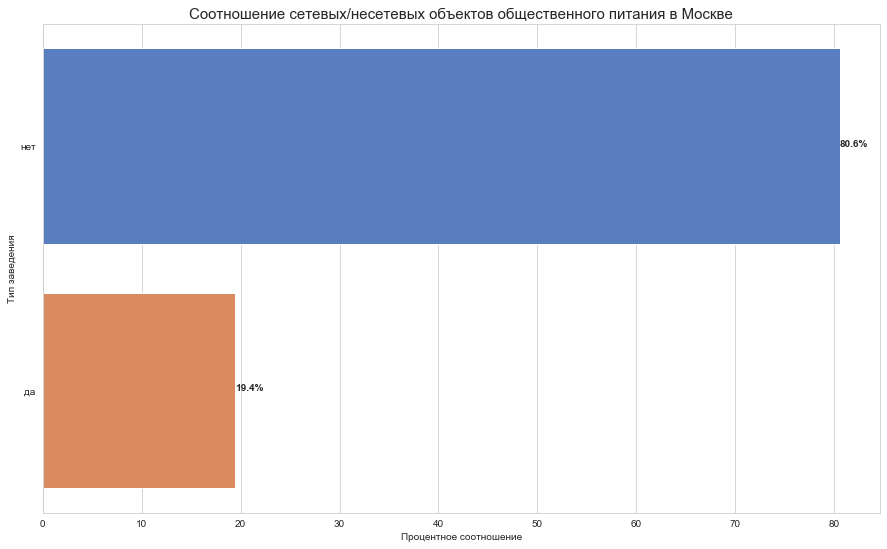

In [24]:
# нарисуем график соотношения сетевых/несетевых заведений общественного питания
bar,ax = plt.subplots(figsize=(15, 9))
ax = sns.barplot(x='Percentage', y=count_per_chain.index, data=count_per_chain, ci=None, palette= "muted", orient='h' )
ax.set_title("Соотношение сетевых/несетевых объектов общественного питания в Москве", fontsize=15)
ax.set_xlabel ("Процентное соотношение")
ax.set_ylabel ("Тип заведения")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, "%.1f%%"% rect.get_width(), weight='bold' )
plt.show();

- Несетевые заведения на рынке общественного питания Москвы составляют 80.6% - 12317 заведений;
- Сетевые заведения на рынке общественного питания Москвы составляют 19.4% - 2964 заведения.

#### Для какого вида объекта общественного питания характерно сетевое распределение?

In [25]:
# отсортируем заведения по количеству
sorted_data = rest_data.sort_values('object_type', ascending=False)

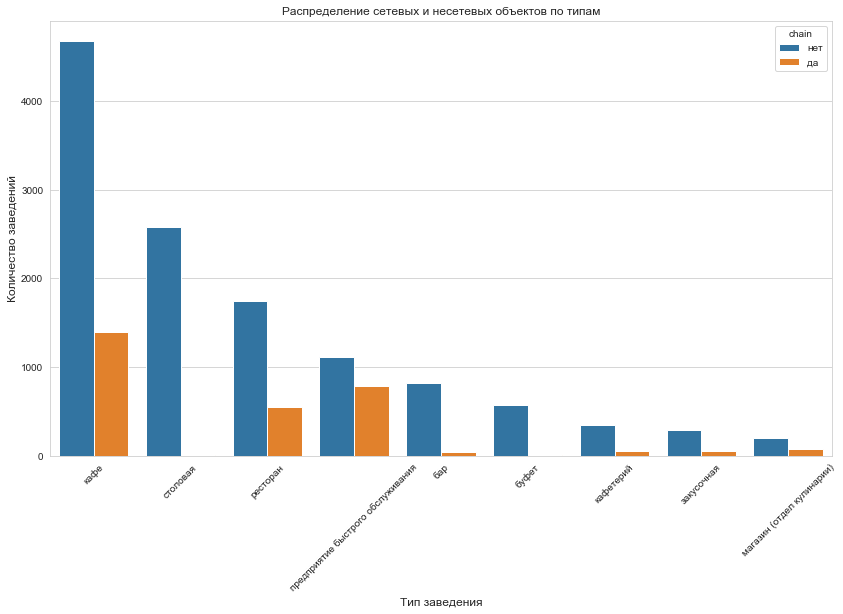

In [26]:
# нарисуем график соотношения сетевых/несетевых заведений по каждому типу объекта
plt.figure(figsize=(14, 8))
ax = sns.countplot(x="object_type", hue = "chain", data = sorted_data,\
                  order = sorted_data['object_type'].value_counts().index)
plt.title('Распределение сетевых и несетевых объектов по типам', fontdict={'size':12})
plt.xlabel('Тип заведения', fontdict={'size': 12},)
plt.ylabel('Количество заведений', fontdict={'size': 12})
plt.xticks(rotation=45)
plt.show();

- Сетевое распределение заведений общественного питания характерно для типов: кафе, предприятие быстрого обслуживания и ресторан;
- Сетевое распределений заведений общественного питания нехарактерно для всех остальных типов.

#### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [27]:
# посчитаем для сетевых заведений количество заведений и количество посадочных мест
count_object_chain = rest_data.query('chain == "да"').groupby('object_name')\
.agg({'object_name' : 'count', 'number' : 'mean'}).round()

In [28]:
count_object_chain.head()

,object_name,number
object_name,,
beverly hills diner,1,88.0
bierloga,1,75.0
black & white,1,40.0
bocconcino,3,67.0
boobo,1,46.0


<Figure size 1080x504 with 0 Axes>

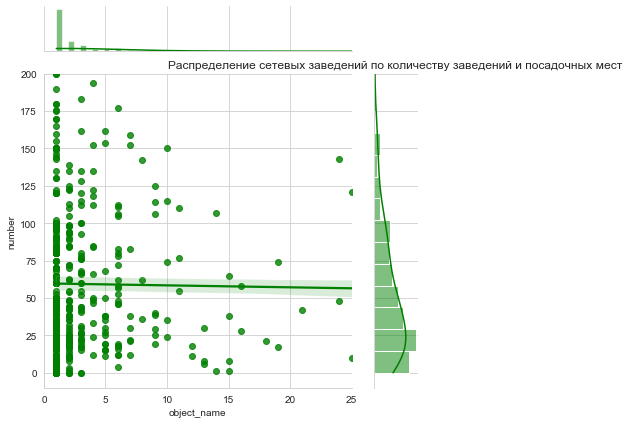

In [29]:
# нарисуем график
plt.figure(figsize=(15, 7))
ax = sns.jointplot(x='object_name', y='number', data=count_object_chain, kind='reg', color='green',\
              height=6, space=0.5, dropna=True, xlim=(0, 25), ylim=(-10, 200))
plt.xlabel('Количество заведений')
plt.ylabel('Количество посадочных мест')
plt.title('Распределение сетевых заведений по количеству заведений и посадочных мест')
plt.show();

- Для сетевых заведений характерно малое количество заведений с большой посадкой. В основном, сети состоят от двух до десяти заведений, а среднее количество мест от 1 до 100.

In [30]:
# посчитаем среднее количество посадочных мест для каждого типа заведения общественного питания
order_for_barplots = (rest_data.groupby(['object_type'], as_index = False)
                      .agg({'number' : 'mean'})
                      .sort_values(by = 'number', ascending = False)
                      .object_type
                      .array)

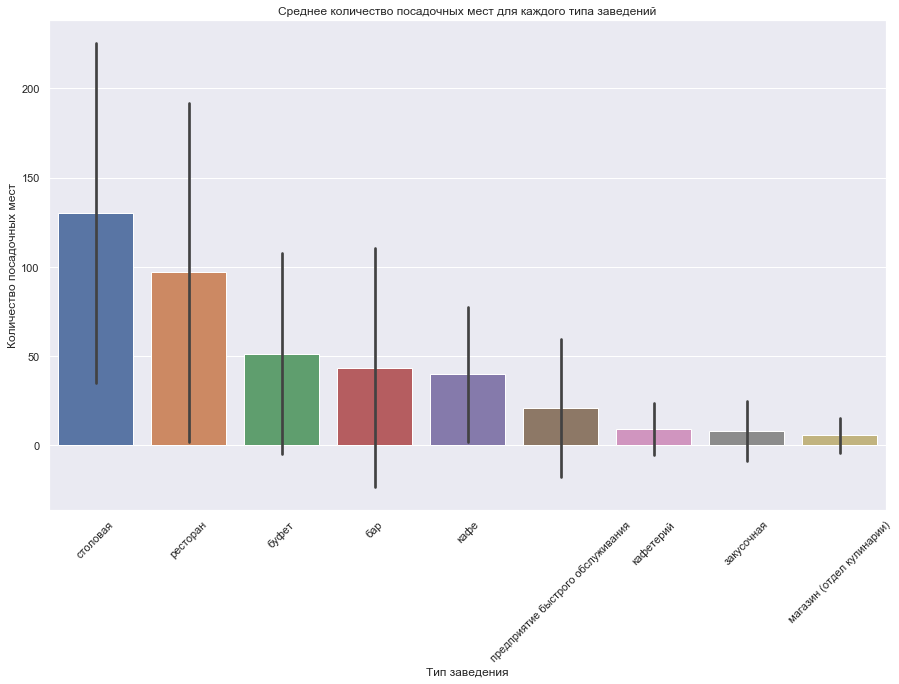

In [31]:
# нарисуем график среднего коилчества посадочных мест для типов заведений
sns.set(rc={'figure.figsize' : (15, 9)})
sns.barplot(x="object_type", y="number", data=rest_data, estimator= np.mean, ci="sd", order=order_for_barplots)
plt.xticks(rotation = 45)
plt.title('Среднее количество посадочных мест для каждого типа заведений')
plt.xlabel('Тип заведения')
plt.ylabel('Количество посадочных мест')
plt.show();

- Наибольшее среднее количество посадочных мест в заведениях типа столовая ~ 140 мест;
- На втором месте рестораны - среднее количество мест ~ 100;
- Равномерно распределены средние значения количества мест у заведений типа буфет, бар и кафе ~ от 55 до 45 мест;
- Наименьшее среднее количество посадочных мест в заведениях типа магазин (отдел кулинарии), закусочная, кафетерий и предприятие быстрого обслуживания.

In [32]:
# в отдельный столбец вынесу информацию об улице, на которой расположено заведение

rest_data['street'] = rest_data.address.str.split(',').str[1].str.strip()

# список, чтобы в таблицу попали только улицы
streets_names = ['улица','проспект','шоссе','проезд','бульвар','переулок','набережная','площадь','вал','аллея']

def get_street(address):
    for position in [0,1,2]:
        for address_part in address.split(',')[position].split(' '):          
            if address_part in streets_names:
                street = address.split(', ')[position]
                return street
            
# применим функцию        
rest_data['street'] = rest_data['address'].apply(get_street)

In [33]:
# проверим
rest_data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [34]:
# достанем для каждой улицы информацию о районе

# используем геокодер Яндекса
spreadsheet_id = '1aBYE6oewnVsDRqJgAfdNRelYhnhRW9NEN254reT1_04'

file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)

r = requests.get(file_name)

rest_district = pd.read_csv(BytesIO(r.content))

In [35]:
# проверим
rest_district.head()

,id,object_name,chain,object_type,address,number,street,district
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский район
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Таганский район
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,район Лианозово
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,район Лианозово


In [36]:
# добавим столбец в основную таблицу
rest_data['district'] = rest_district['district']

In [37]:
# проверим
rest_data.head()

,id,object_name,chain,object_type,address,number,street,district
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский район
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Таганский район
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,район Лианозово
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,район Лианозово


In [38]:
# найдем топ-10 улиц по количеству заведений общественного питания
top10_streets = rest_data['street'].value_counts().head(10).index

top10_streets = rest_data.query('street in @top10_streets').sort_values(by='street', ascending=False)

In [39]:
# выведем топ-10 улиц
top10_streets['street'].value_counts()

проспект Мира             203
Профсоюзная улица         182
Ленинградский проспект    172
Пресненская набережная    167
Варшавское шоссе          165
Ленинский проспект        148
проспект Вернадского      128
Кутузовский проспект      114
Каширское шоссе           111
Кировоградская улица      108
Name: street, dtype: int64

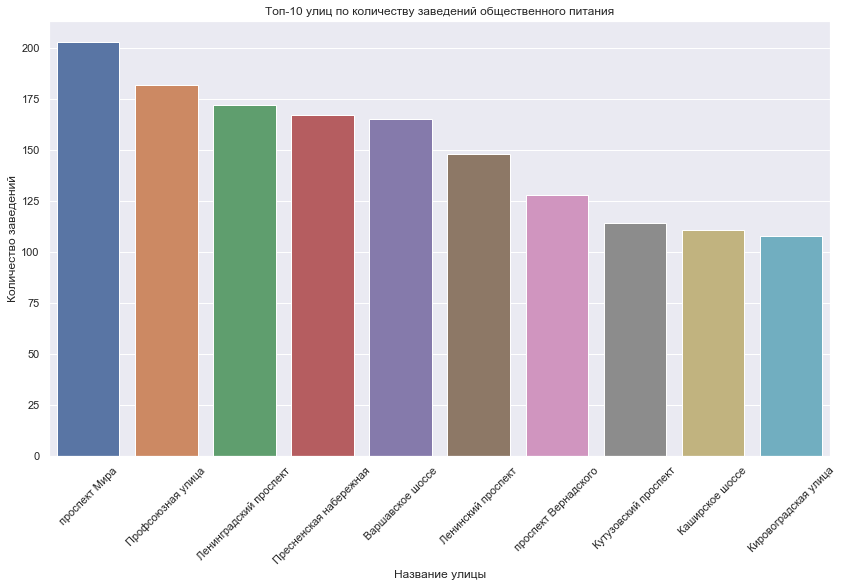

In [40]:
# нарисуем график топ-10 улиц по количеству заведений общественного питания
plt.figure(figsize=(14, 8))
sns.countplot(x="street", data=top10_streets, order = top10_streets['street'].value_counts().index)
plt.xticks(rotation = 45)
plt.title('Топ-10 улиц по количеству заведений общественного питания')
plt.xlabel('Название улицы')
plt.ylabel('Количество заведений')
plt.show();

- проспект Мира - 203 заведения;
- Профсоюзная улица - 182 заведения;
- Ленинградский проспект - 172 заведения;
- Пресненская набережная - 167 заведений;
- Варшавское шоссе - 165 заведений;
- Ленинский проспект - 148 заведений;
- проспект Вернадского - 128 заведений;
- Кутузовский проспект - 114 заведений;
- Каширское шоссе - 111 заведений;
- Кировоградская улица - 108 заведений.

---

Больше всего объектов общественного питания расположено на проспекте Мира - 203 заведения, а меньше всего объектов общественного питания расположено Кировоградской улице - 108 заведений.

In [41]:
# посмотрим, в каких районах расположены топ-10 улиц по количеству заведений
top10_streets['district'].value_counts().head(10)

Московский международный деловой центр Москва-Сити    167
район Чертаново Центральное                           90 
район Тропарёво-Никулино                              82 
Мещанский район                                       63 
район Свиблово                                        62 
район Дорогомилово                                    61 
район Аэропорт                                        61 
район Нагатино-Садовники                              55 
район Фили-Давыдково                                  53 
Алексеевский район                                    50 
Name: district, dtype: int64

- Московский международный деловой центр Москва-Сити;
- район Чертаново Центральное;
- район Тропарёво-Никулино;
- Мещанский район;
- район Свиблово;
- район Аэропорт;
- район Дорогомилово;
- район Нагатино-Садовники;
- район Фили-Давыдково;
- Алексеевский район.

In [42]:
# посчитаем, сколько в Москве улиц с одним заведением общественного питания
one_streets = rest_data.pivot_table(index=['street'], values = 'object_name', aggfunc = 'count')\
.query('object_name == "1"')['object_name'].count()

In [43]:
print('В Москве насчитывается {} улиц с одним заведением общественого питания.'.format(one_streets))

В Москве насчитывается 527 улиц с одним заведением общественого питания.


In [44]:
# определим, в каких районах больше всего улиц с одним заведением общественного питания
one_streets_district = rest_data.pivot_table(index=['street', 'district'], values = 'object_name', aggfunc = 'count')\
.query('object_name == "1"')\
.groupby('district').agg({'object_name' : 'count'})\
.sort_values(by='object_name', ascending=False).head(10)

In [45]:
# выведем
one_streets_district

,object_name
district,
Таганский район,27
Тверской район,23
Басманный район,23
район Марьина Роща,19
Пресненский район,17
район Богородское,13
Даниловский район,12
Мещанский район,12
район Замоскворечье,12


#### Улицы с одним объектом общественного питания распределены в районах:
- Таганский район - 27 улиц;
- Тверской район - 23 улицы;
- Басманный район - 23 улицы;
- район Марьина Роща - 19 улиц;
- Пресненский район - 17 улиц;
- район Богородское - 13 улиц;
- Даниловский район - 12 улиц;
- Мещанский район - 12 улиц;
- район Замоскворечье - 12 улиц;
- район Соколиная гора - 11 улиц.

---

Больше всего улиц с одним заведением общественного питания находится в Таганском районе.

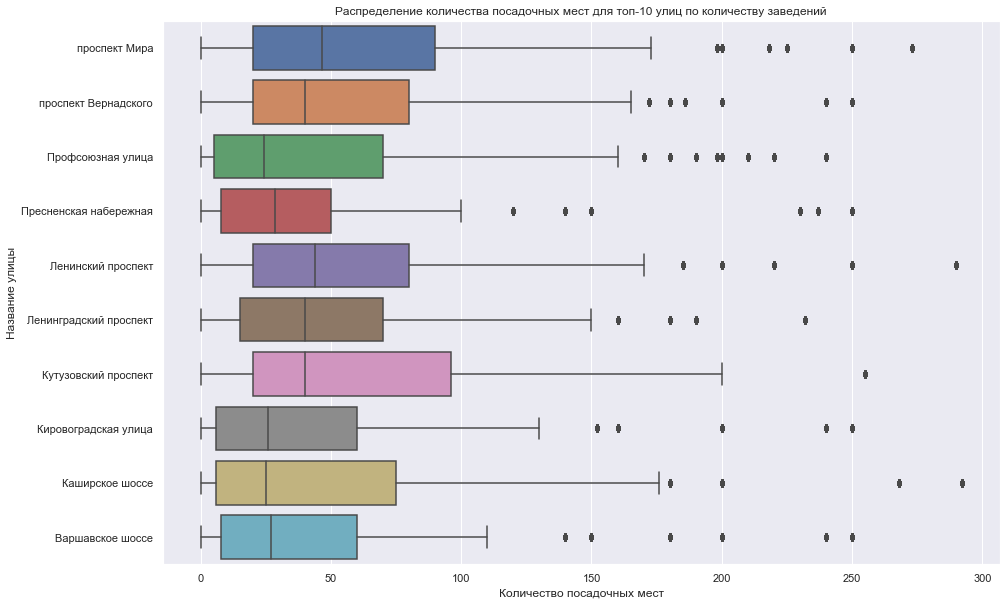

In [46]:
# распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

top10_streets_rests = pd.merge(left = top10_streets, right=rest_data['street'], on='street', how='left')
streets_rests = top10_streets_rests.query('number < 300')

# нарисуем график
plt.figure(figsize=(15, 10))
sns.boxplot(x='number', y='street', data=streets_rests, orient='h')
plt.title('Распределение количества посадочных мест для топ-10 улиц по количеству заведений')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Название улицы')
plt.show();

- Медианное значение количества посадочных мест для топ-10 улиц распределено в пределах от 20 до 50 мест;
- Максимальное значение количества посадочных мест - 200 мест - Кутузовский проспект;
- В среднем, аномальные значения для каждой улицы начинаются после 150 посадочных мест.

### <a id='step4'>Общий вывод</a>

- Самую большую долю на рынке общественного питания Москвы занимают заведения типа кафе - они составляют 39.7% от всего рынка - 6071 заведений;
- Наименьшую долю на рынке общественного питания Москвы занимают заведения типа магазин (отдел кулинарии) - они составляют 1.8% от всего рынка - 273 заведения;
- Несетевые заведения на рынке общественного питания Москвы занимают 80.6% от общего рынка - 12317 заведений;
- Сетевые заведения на рынке общественного питания Москвы занимают 19.4% от общего рынка - 2964 заведений;
- В основном, сетевое распределение характерно для типов заведений - кафе, предприятия быстрого обслуживания и рестораны;
- Для сетевых заведений характерно небольшое количество заведений с большим количеством посадочных мест. В основном, сети состоят от двух до десяти заведений, а среднее количество мест от 1 до 100;
- Наибольшее среднее количество посадочных мест в заведениях типа столовая ~ 140 мест.

---

#### Топ-10 улиц по количеству заведений общественного питания выглядит так:
- проспект Мира - 203 заведения;
- Профсоюзная улица - 182 заведения;
- Ленинградский проспект - 172 заведения;
- Пресненская набережная - 167 заведений;
- Варшавское шоссе - 165 заведений;
- Ленинский проспект - 148 заведений;
- проспект Вернадского - 128 заведений;
- Кутузовский проспект - 114 заведений;
- Каширское шоссе - 111 заведений;
- Кировоградская улица - 108 заведений.

---

#### Топ-10 улиц по количеству заведений общественного питания расположены в следующих районах:
- Московский международный деловой центр Москва-Сити;
- район Чертаново Центральное;
- район Тропарёво-Никулино;
- Мещанский район;
- район Свиблово;
- район Аэропорт;
- район Дорогомилово;
- район Нагатино-Садовники;
- район Фили-Давыдково;
- Алексеевский район.

---

#### В Москве 527 улиц с одним объектом общественного питания.

---

##### Улицы с одним объектом общественного питания расположены в следующих районах:
- Таганский район - 27 улиц;
- Тверской район - 23 улицы;
- Басманный район - 23 улицы;
- район Марьина Роща - 19 улиц;
- Пресненский район - 17 улиц;
- район Богородское - 13 улиц;
- Даниловский район - 12 улиц;
- Мещанский район - 12 улиц;
- район Замоскворечье - 12 улиц;
- район Соколиная гора - 11 улиц.

---

#### Среднее количество посадочных мест для улиц с большим количеством заведений общественного питания составляет от 20 до 50 мест.

---

#### Рекомендации
Наиболее оптимальным вариантом будет открыть заведение типа кафе или ресторан. Стоит выбрать несетевую модель распространения. В заведении должно быть не менее 10, но не более 100 посадочных мест. По-возможности, заведение должно располагаться в одном из трех районов: Московский международный деловой центр Москва-Сити; район Чертаново Центральное или район Тропарёво-Никулино.
Возможно, такое распределение на районы может показаться странным, ввиду большого количества заведений общественного питания и их плотности, но также стоит учесть тот момент, что подобные районы притягивают больше всего потенциальных клиентов. При правильно выстроенном маркетинге, есть очень большая вероятность, что наше заведение привлечет большое количество клиентов.